In [67]:
!pip install pandas
!pip install matplotlib
!pip install numpy
!pip install scikit-learn

import csv # lib for reading csvs
import pandas as pd #for processing data into a DataFrame.
import matplotlib.pyplot as plt #for plotting.

#dont care about these for now.
import numpy as np #for numerical processing.
from sklearn.linear_model import LogisticRegression #a type of classification model.
from sklearn.model_selection import train_test_split #function useful to split data into (train|test) splits
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler #scaling values.


[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: pip install --upgrade pip


In [68]:
# Load the data
solar_data = pd.read_csv("./solar_weather_data.csv")
print(type(solar_data))
print(solar_data.head())
print(solar_data.tail())
print("\n")

<class 'pandas.core.frame.DataFrame'>
   cloudcover   dew  humidity  precip  precipprob  solarenergy  \
0        47.6  39.5     90.04     0.0           0          0.1   
1        57.5  39.1     89.49     0.0           0          0.1   
2        54.9  39.2     92.63     0.0           0          0.1   
3        56.9  40.4     91.68     0.0           0          0.1   
4        48.6  42.9     90.07     0.0           0          0.5   

   solarradiation  sunelevation  temp  uvindex  whProduced  
0               0         -26.4  42.2        0           0  
1               0         -14.6  42.0        0           0  
2              26          -3.1  41.2        0          49  
3              29           7.9  42.6        0         801  
4             142          17.7  45.7        1        1703  
       cloudcover   dew  humidity  precip  precipprob  solarenergy  \
19018         8.5  47.6     42.51     0.0           0          2.3   
19019         8.5  51.2     50.46     0.0           0      

In [69]:
## Remove rows which where affected by database outages
# Remove rows with 0 whProduced and sunelevation > -1, the sun cant be up and not producing power
solar_data = solar_data.drop(solar_data[(solar_data['sunelevation'] > -1) & (solar_data['whProduced'] < 5)].index)
# Remove rows with whProduced > 5000, these are likely outliers
solar_data = solar_data.drop(solar_data[solar_data['whProduced'] > 5000].index)

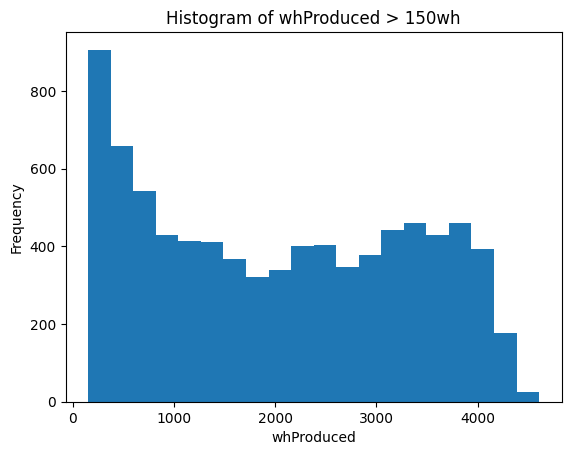

In [74]:
filtered_data = solar_data[solar_data['whProduced'] > 150]
plt.hist(filtered_data['whProduced'], bins=20)
plt.xlabel('whProduced')
plt.ylabel('Frequency')
plt.title('Histogram of whProduced > 150wh')
plt.show()

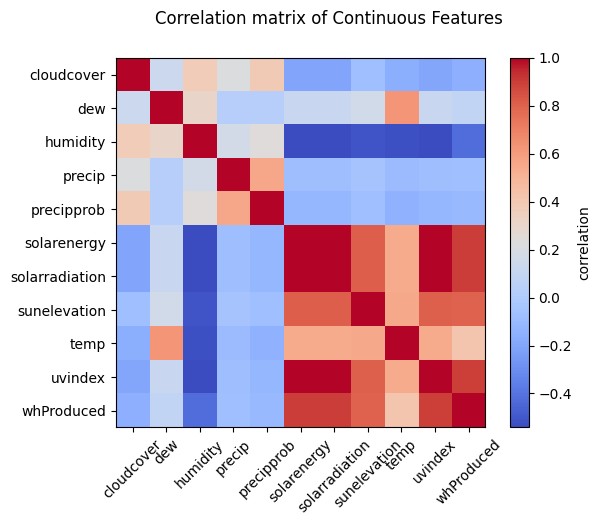

In [71]:
corrmat = solar_data.corr()
plt.imshow(corrmat, cmap='coolwarm')
plt.colorbar(label = "correlation")
plt.xticks(range(len(corrmat)), corrmat.columns, rotation=45)
plt.yticks(range(len(corrmat)), corrmat.columns)
plt.suptitle("Correlation matrix of Continuous Features")
plt.show()

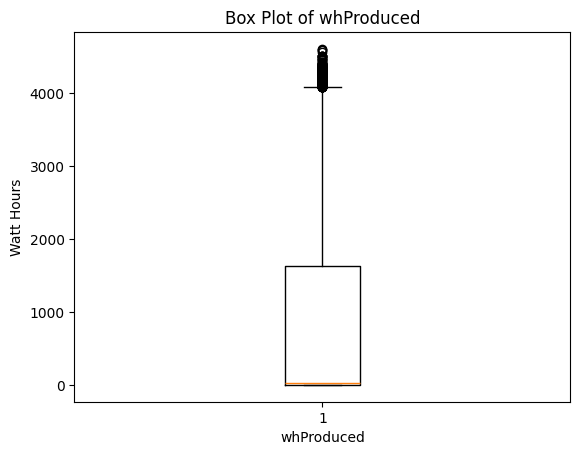

In [72]:
plt.boxplot(solar_data['whProduced'])
plt.xlabel('whProduced')
plt.ylabel('Watt Hours')
plt.title('Box Plot of whProduced')
plt.show()


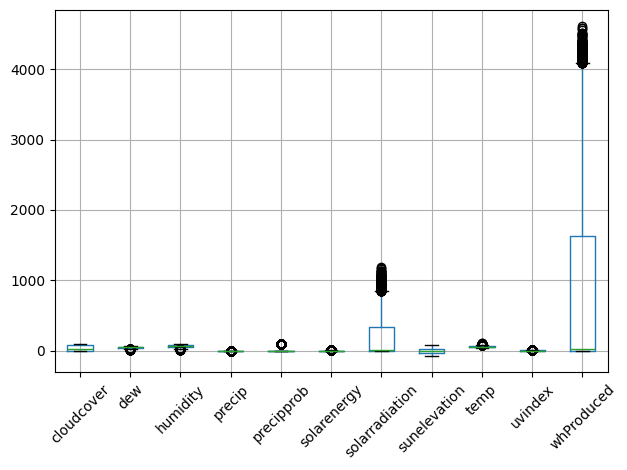

In [73]:
solar_data.boxplot()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Why are the box plots so wild?!?